In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV

In [3]:
x = pd.read_csv('train.csv', encoding='euc-kr')
x

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,year,month,day,hour,count
0,1,0,0,1,9.84,14.395,81,8.831761,2011,1,1,0,16
1,1,0,0,1,9.02,13.635,80,8.527546,2011,1,1,1,40
2,1,0,0,1,9.02,13.635,80,8.456593,2011,1,1,2,32
3,1,0,0,1,9.84,14.395,75,8.614047,2011,1,1,3,13
4,1,0,0,1,9.84,14.395,75,8.437458,2011,1,1,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,4,0,1,1,15.58,19.695,50,26.002700,2012,12,19,19,336
10882,4,0,1,1,14.76,17.425,57,15.001300,2012,12,19,20,241
10883,4,0,1,1,13.94,15.910,61,15.001300,2012,12,19,21,168
10884,4,0,1,1,13.94,17.425,61,6.003200,2012,12,19,22,129


In [4]:
x['season'] = x['season'].astype('category')

In [5]:
x['season']

0        1
1        1
2        1
3        1
4        1
        ..
10881    4
10882    4
10883    4
10884    4
10885    4
Name: season, Length: 10886, dtype: category
Categories (4, int64): [1, 2, 3, 4]

In [6]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10886 entries, 0 to 10885
Data columns (total 13 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      10886 non-null  category
 1   holiday     10886 non-null  int64   
 2   workingday  10886 non-null  int64   
 3   weather     10886 non-null  int64   
 4   temp        10886 non-null  float64 
 5   atemp       10886 non-null  float64 
 6   humidity    10886 non-null  int64   
 7   windspeed   10886 non-null  float64 
 8   year        10886 non-null  int64   
 9   month       10886 non-null  int64   
 10  day         10886 non-null  int64   
 11  hour        10886 non-null  int64   
 12  count       10886 non-null  int64   
dtypes: category(1), float64(3), int64(9)
memory usage: 1.0 MB


In [7]:
season = pd.get_dummies(x['season'], prefix='season')

In [8]:
x['year'].value_counts()

2012    5464
2011    5422
Name: year, dtype: int64

In [9]:
year = pd.get_dummies(x['year'], prefix='year')

In [10]:
x = pd.concat([x, season], axis=1)
x = pd.concat([x, year], axis=1)
x = x.drop('season', axis=1)
x = x.drop('year', axis=1)
x

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,8.831761,1,1,0,16,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,8.527546,1,1,1,40,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,8.456593,1,1,2,32,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,8.614047,1,1,3,13,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,8.437458,1,1,4,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,26.002700,12,19,19,336,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,15.001300,12,19,20,241,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,15.001300,12,19,21,168,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,6.003200,12,19,22,129,0,0,0,1,0,1


In [11]:
x['windspeed'] = np.log(x['windspeed'] + 1)
x

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,2.285618,1,1,0,16,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,2.254187,1,1,1,40,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,2.246712,1,1,2,32,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,2.263225,1,1,3,13,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,2.244687,1,1,4,1,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,3.295937,12,19,19,336,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,2.772670,12,19,20,241,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,2.772670,12,19,21,168,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,1.946367,12,19,22,129,0,0,0,1,0,1


In [12]:
x.corr()

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,count,season_1,season_2,season_3,season_4,year_2011,year_2012
holiday,1.000000,-0.250491,-0.007074,0.000295,-0.005215,0.001929,0.025596,0.001731,-0.015877,-0.000354,-0.005393,-0.007336,-0.038250,0.022790,0.022751,-0.012021,0.012021
workingday,-0.250491,1.000000,0.033772,0.029966,0.024660,-0.010880,0.020499,-0.003394,0.009829,0.002780,0.011594,-0.000379,0.014620,-0.007194,-0.007048,0.002482,-0.002482
weather,-0.007074,0.033772,1.000000,-0.055035,-0.055376,0.406244,-0.006262,0.012144,-0.007890,-0.022740,-0.128655,0.005414,0.004157,-0.047316,0.037771,0.012548,-0.012548
temp,0.000295,0.029966,-0.055035,1.000000,0.984948,-0.064949,0.021966,0.257589,0.015551,0.145430,0.394454,-0.565655,0.192661,0.635975,-0.266220,-0.061226,0.061226
atemp,-0.005215,0.024660,-0.055376,0.984948,1.000000,-0.043536,-0.013701,0.264173,0.011866,0.140343,0.389784,-0.569082,0.204421,0.607090,-0.245690,-0.058540,0.058540
humidity,0.001929,-0.010880,0.406244,-0.064949,-0.043536,1.000000,-0.327816,0.204537,-0.011335,-0.278011,-0.317371,-0.166208,-0.031095,0.067308,0.129018,0.078606,-0.078606
windspeed,0.025596,0.020499,-0.006262,0.021966,-0.013701,-0.327816,1.000000,-0.117610,0.021314,0.148350,0.123220,0.088229,0.050621,-0.085330,-0.053004,0.037489,-0.037489
month,0.001731,-0.003394,0.012144,0.257589,0.264173,0.204537,-0.117610,1.000000,0.001974,-0.006818,0.166862,-0.750291,-0.255581,0.248354,0.753087,0.004932,-0.004932
day,-0.015877,0.009829,-0.007890,0.015551,0.011866,-0.011335,0.021314,0.001974,1.000000,0.001132,0.019826,-0.002491,0.001019,0.000941,0.000516,-0.001800,0.001800
hour,-0.000354,0.002780,-0.022740,0.145430,0.140343,-0.278011,0.148350,-0.006818,0.001132,1.000000,0.400601,0.008357,-0.002733,-0.002611,-0.002964,0.004234,-0.004234


In [13]:
X = x.drop('count', axis=1)
Y = x['count']
X

,holiday,workingday,weather,temp,atemp,humidity,windspeed,month,day,hour,season_1,season_2,season_3,season_4,year_2011,year_2012
0,0,0,1,9.84,14.395,81,2.285618,1,1,0,1,0,0,0,1,0
1,0,0,1,9.02,13.635,80,2.254187,1,1,1,1,0,0,0,1,0
2,0,0,1,9.02,13.635,80,2.246712,1,1,2,1,0,0,0,1,0
3,0,0,1,9.84,14.395,75,2.263225,1,1,3,1,0,0,0,1,0
4,0,0,1,9.84,14.395,75,2.244687,1,1,4,1,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10881,0,1,1,15.58,19.695,50,3.295937,12,19,19,0,0,0,1,0,1
10882,0,1,1,14.76,17.425,57,2.772670,12,19,20,0,0,0,1,0,1
10883,0,1,1,13.94,15.910,61,2.772670,12,19,21,0,0,0,1,0,1
10884,0,1,1,13.94,17.425,61,1.946367,12,19,22,0,0,0,1,0,1


In [14]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=7)

In [15]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((7620, 16), (3266, 16), (7620,), (3266,))

In [16]:
# from sklearn.linear_model import LogisticRegression 
# from sklearn.pipeline import Pipeline 
# from sklearn.model_selection import learning_curve
# from sklearn.preprocessing import StandardScaler

# pipe_lr = Pipeline([('scl',StandardScaler()),('clf',LogisticRegression(penalty='l2',random_state=0))])

# train_sizes, train_scores,test_scores = learning_curve(estimator=pipe_lr, X=x_train, y=y_train, train_sizes=np.linspace(1,0.1,10), cv=10, n_jobs=1)

# train_mean = np.mean(train_scores,axis=1)
# train_std = np.std(train_scores,axis=1)
# test_mean = np.mean(test_scores,axis=1)
# test_std = np.std(test_scores,axis=1)

# plt.plot(train_sizes,train_mean, color='blue', marker='o', markersize=5, label='training accuracy')
# plt.plot(train_sizes,test_mean, color='green',linestyle='--', marker='s', markersize=5, label='validation accuracy')



Text(0.5, 0, 'humidity (after transformation)')

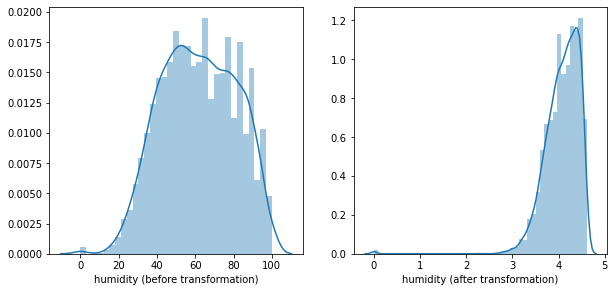

In [17]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(x_train['humidity'])
plt.xlabel("humidity (before transformation)")
plt.subplot(222)
sns.distplot(np.log(x_train['humidity'] + 1))
plt.xlabel("humidity (after transformation)")

Text(0.5, 0, 'temp)')

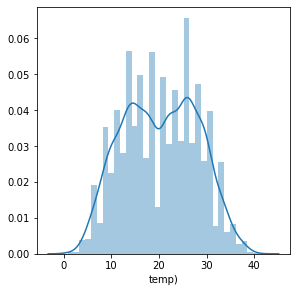

In [18]:
plt.figure(figsize=(10, 10))
plt.subplot(221)
sns.distplot(x_train['temp'])
plt.xlabel("temp)")

In [19]:
from sklearn.metrics import make_scorer

def rmsle(predicted_values, actual_values):
    # 넘파이로 배열 형태로 바꿔준다.
    predicted_values = np.array(predicted_values)
    actual_values = np.array(actual_values)
    
    # 예측값과 실제 값에 1을 더하고 로그를 씌워준다.
    log_predict = np.log(predicted_values + 1)
    log_actual = np.log(actual_values + 1)
    
    # 위에서 계산한 예측값에서 실제값을 빼주고 제곱을 해준다.
    difference = log_predict - log_actual
    # difference = (log_predict - log_actual) ** 2
    difference = np.square(difference)
    
    # 평균을 낸다.
    mean_difference = difference.mean()
    
    # 다시 루트를 씌운다.
    score = np.sqrt(mean_difference)
    
    return score

rmsle_scorer = make_scorer(rmsle)
rmsle_scorer

make_scorer(rmsle)

In [20]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn import ensemble
import time
#MSE의 변화를 확인하기 위하여 앙상블의 크기 범위에서 랜덤 포레스트 트레이닝
start_time = time.time()
nTreeList = [50, 100, 150, 200, 250, 300, 350, 400, 450, 500, 600, 700, 800, 900, 1000]
for iTrees in nTreeList:
    maxFeat = 4 #조정해볼 것
    rf = ensemble.RandomForestRegressor(n_estimators=iTrees,
                                        max_depth=3, max_features=maxFeat,
                                        oob_score=False, random_state=531)
    rf.fit(x_train, y_train)
    #데이터 세트에 대한 MSE 누적
    y_rf = rf.predict(x_test)

    RMSE = mean_squared_error(y_test, y_rf)**0.5
    print('n_estimators : ',iTrees, 'RMSE : ',RMSE)
end_time = time.time()

n_estimators :  50 RMSE :  133.9582949510308
n_estimators :  100 RMSE :  132.75816686237263
n_estimators :  150 RMSE :  132.38742837894242
n_estimators :  200 RMSE :  132.67140447964357
n_estimators :  250 RMSE :  132.5082125738337
n_estimators :  300 RMSE :  132.28519681293625
n_estimators :  350 RMSE :  132.2701444573396
n_estimators :  400 RMSE :  132.32247922208748
n_estimators :  450 RMSE :  132.44938731962552
n_estimators :  500 RMSE :  132.13490408707642
n_estimators :  600 RMSE :  131.9868459663596
n_estimators :  700 RMSE :  132.231522456038
n_estimators :  800 RMSE :  132.23960586701574
n_estimators :  900 RMSE :  132.25536755181432
n_estimators :  1000 RMSE :  132.16974905830654


In [21]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = ensemble.RandomForestRegressor(n_estimators=iTrees,
            max_depth=3, max_features=maxFeat,
            oob_score=False, random_state=531),
            shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[    -0.             -0.             -0.             -0.
      -0.        ]
 [-14474.18151717 -18274.21079546 -11092.51394981  -6675.52262097
  -11849.9663242 ]
 [-16424.96545284 -17860.51116894 -16115.86644583 -13182.16961306
  -15060.88757605]
 [-17871.97335559 -17829.09787763 -17564.06059134 -15086.58724159
  -14145.67761486]
 [-18225.58163259 -17969.00447724 -17959.31108433 -15519.69123392
  -13845.6950571 ]
 [-18271.91765739 -18004.23629105 -17897.84774226 -15041.58675456
  -13820.87349912]
 [-18371.25416651 -18037.65684015 -17919.68622509 -15228.55284254
  -13788.32312343]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -74508.89348026 -162177.00367478  -44376.99448783  -42509.62333486
   -62703.31740928]
 [ -14308.07525445  -15899.26110672  -11263.20007288  -33687.77192164
   -34293.67917909]
 [ -13144.58627715  -11476.59306127  -10764.1403131   -27728.38705882
   -33412.36662006]
 [ -12058.05560133  -10840.3

In [22]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1          -0.000000
100     12473.279042
500     15728.880051
2000    16499.479336
5000    16703.856697
7000    16607.292389
8708    16669.094640
dtype: float64

 --------------------

Mean validation scores

 1       77255.166477
100     21890.397507
500     19305.214666
2000    18640.988659
5000    18820.337035
7000    18860.493033
8708    18919.507255
dtype: float64


(0.0, 30000.0)

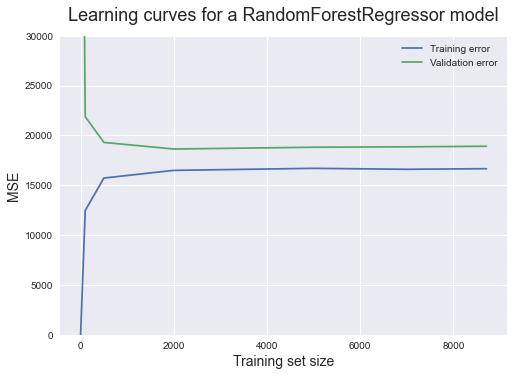

In [23]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a RandomForestRegressor model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,30000)

In [24]:
print('time : ',end_time - start_time)
print('RMSE : ',RMSE)

time :  18.853795766830444
RMSE :  132.16974905830654


In [25]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

k_fold = KFold(n_splits=10, shuffle=True, random_state=0)
%time score = cross_val_score(rf, x_train, y_train, cv=k_fold, scoring=rmsle_scorer)
score = score.mean()

Wall time: 25.5 s


In [26]:
print(score)

1.158350800537146


## xgboost

In [27]:
import xgboost

In [28]:
from sklearn.model_selection import learning_curve
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = xgboost.XGBRegressor(n_estimators=iTrees,
                               learning_rate=0.08,
                               gamma=0,
                               subsample=0.75,
                               colsample_bytree=1,
                               max_depth=7),
            shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[-3.35276127e-08 -1.34110451e-07 -3.35276127e-08 -8.38190317e-09
  -4.40195436e-10]
 [-3.07763039e-07 -3.26551752e-07 -3.54923116e-07 -3.11233552e-07
  -3.08803644e-07]
 [-5.25330906e-07 -5.02467633e-07 -5.27943434e-07 -4.83387676e-07
  -4.58524049e-07]
 [-3.29142445e-02 -3.12331669e-02 -3.31018821e-02 -2.92819078e-02
  -1.85253298e-02]
 [-5.52615152e+00 -5.11958017e+00 -4.69783341e+00 -4.28365714e+00
  -4.58043654e+00]
 [-1.76374011e+01 -1.62223059e+01 -1.83901901e+01 -1.48292251e+01
  -1.48645575e+01]
 [-3.41577042e+01 -2.94807088e+01 -3.05597415e+01 -2.58337119e+01
  -2.45841144e+01]]

 ----------------------------------------------------------------------

Validation scores:

 [[ -32296.88826624 -132921.68480707  -21264.82707849  -56584.78405435
  -109365.33658742]
 [ -12097.06807503   -9130.73608397  -11626.2564047   -17813.20783087
   -25351.0810593 ]
 [  -4592.07275931   -3449.22135605   -3462.84103508   -8284.69686339
   -11070.63719502]
 [  -2274.76651082  

In [29]:
# start_time = time.time()
# nTreeList = [0, 1, 5, 10, 15, 20, 30, 35, 40, 45, 50]
# for iTrees in nTreeList:
#     maxFeat = 4 #조정해볼 것
#     xgb = xgboost.XGBRegressor(n_estimators=iTrees,
#                                learning_rate=0.08,
#                                gamma=0,
#                                subsample=0.75,
#                                colsample_bytree=1,
#                                max_depth=7)
#     xgb.fit(x_train, y_train)
#     #데이터 세트에 대한 MSE 누적
#     y_xgb = xgb.predict(x_test)

#     RMSE = mean_squared_error(y_test, y_xgb)**0.5
#     print('n_estimators : ',iTrees, 'RMSE : ',RMSE)

# end_time = time.time()

In [30]:
# from sklearn.model_selection import GridSearchCV
# start_time = time.time()
# gcv = GridSearchCV(xgb,       # estimator
#             param_grid={'n_estimators':[10,20,30,40,50],
#                         'learning_rate':[0.08],
#                         'gamma':[0],
#                         'subsample':[0.75],
#                         'colsample_bytree':[1,2,3],
#                         'max_depth':[1,2,3,4],
#                         } , # 찾고자하는 파라미터. dict형식
#             cv=k_fold,
#             scoring=rmsle_scorer,  
#             n_jobs= 4,     # 병렬 처리갯수? -1은 전부)
#             refit=True     # default가 True. 
#                            # 좋은 estimator로 수정되어짐.
#             )   
# gcv
# gcv.fit(x_train,y_train)   # train_X, train_Y 
# gcv.best_params_           # 좋은 파라미터를 보여줌.
# end_time = time.time()
# gcv.best_score_

# print(gcv.best_params_ )
# print(gcv.best_score_)
# print('time : ',end_time - start_time)

In [31]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1       4.199755e-08
100     3.218550e-07
500     4.995307e-07
2000    2.901131e-02
5000    4.841532e+00
7000    1.638874e+01
8708    2.892320e+01
dtype: float64

 --------------------

Mean validation scores

 1       70486.704159
100     15203.669891
500      6171.893842
2000     3511.088190
5000     3045.786074
7000     2750.652373
8708     2671.704929
dtype: float64


(0.0, 10000.0)

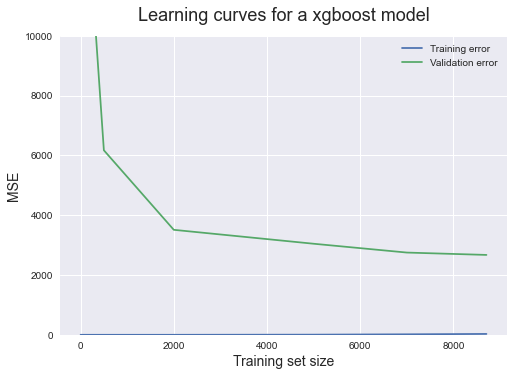

In [32]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a xgboost model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(0,10000)

## LinearRegression

In [33]:
from sklearn.linear_model import LinearRegression
train_sizes = [1, 100, 500, 2000, 5000, 7000,8708]
features = ['holiday', 'workingday', 'weather', 'temp', 'atemp', 'humidity', 'windspeed', 'month', 'day', 'hour', 'season_1', 'season_2', 'season_3', 'season_4', 'year_2011', 'year_2012']
target = 'count'
train_sizes, train_scores, validation_scores = learning_curve(
estimator = LinearRegression(), shuffle=True,
            X = x[features],
            y = x[target],
            train_sizes = train_sizes,
            cv = 5,
            scoring = 'neg_mean_squared_error') #평균제곱오차(MSE)의 반대인 음숫값을 계산
                                                #사이킷런의 교차검증은 scoring 매개변수에 (낮을수록 좋은) 비용함수가 아닌
                                                #(클 수록 좋은) 효용 함수를 기대하기 때문


print('Training scores:\n\n', train_scores)
print('\n', '-' * 70) # separator to make the output easy to read
print('\nValidation scores:\n\n', validation_scores)

Training scores:

 [[    -0.             -0.             -0.             -0.
      -0.        ]
 [-24213.00964806 -17209.99644096 -18553.66531526 -15905.33548651
  -13206.31302713]
 [-20688.90246641 -21657.47940208 -20761.75972687 -18877.70421538
  -15304.71930624]
 [-21676.45921741 -20987.66440106 -21674.79944255 -17921.05277411
  -16081.11579659]
 [-20898.15681834 -21952.10490971 -21852.68111341 -18127.87767591
  -16290.33594347]
 [-21319.69264812 -21688.77438766 -21584.2171585  -17910.63167355
  -16437.88054017]
 [-21189.86362369 -21630.88148726 -21629.67420875 -17928.72624487
  -16418.37115731]]

 ----------------------------------------------------------------------

Validation scores:

 [[-34029.53902663 -23063.35737253 -30726.61828204 -68116.42168121
  -78333.08314194]
 [-19740.12564081 -19258.9616533  -15772.95027923 -29631.92066339
  -37031.83122685]
 [-15333.94058966 -14244.50628241 -13936.77871303 -28268.81556814
  -34326.72144175]
 [-14972.90774007 -13002.53431981 -12740.11

In [34]:
train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)
print('Mean training scores\n\n', pd.Series(train_scores_mean, index = train_sizes))
print('\n', '-' * 20) # separator
print('\nMean validation scores\n\n',pd.Series(validation_scores_mean, index = train_sizes))

Mean training scores

 1          -0.000000
100     17817.663984
500     19458.113023
2000    19668.218326
5000    19824.231292
7000    19788.239282
8708    19759.503344
dtype: float64

 --------------------

Mean validation scores

 1       46853.803901
100     24287.157893
500     21222.152519
2000    20582.801179
5000    20600.137340
7000    20517.971194
8708    20501.404471
dtype: float64


(15000.0, 25000.0)

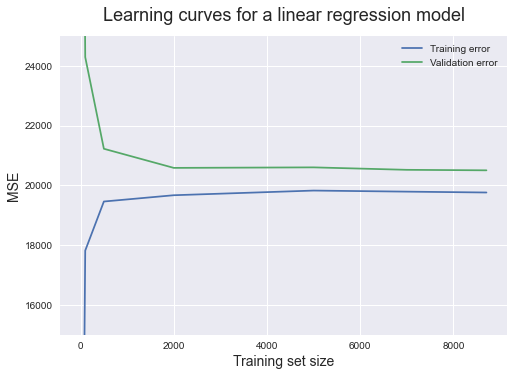

In [35]:
import matplotlib.pyplot as plt

plt.style.use('seaborn')
plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('MSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for a linear regression model', fontsize = 18, y = 1.03)
plt.legend()
plt.ylim(15000,25000)

## lightgbm

In [36]:
pip install lightgbm

Start training...
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse rate 0.031067
[LightGBM] [Debug] init for col-wise cost 0.000002 seconds, init for row-wise cost 0.000624 seconds
[LightGBM] [Warning] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000217 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Debug] Using Dense Multi-Val Bin
[LightGBM] [Info] Total Bins 511
[LightGBM] [Info] Number of data points in the train set: 7620, number of used features: 16
[LightGBM] [Debug] Use subset for bagging
[LightGBM] [Info] Start training from score 191.680709
[LightGBM] [Debug] Re-bagging, using 6116 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
Training until validation scores don't improve for 50 rounds
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and

[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Re-bagging, using 6080 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Re-bagging, using 6077 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and ma

[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Re-bagging, using 6107 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Re-bagging, using 6091 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 7
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Re-bagging, using 6101 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[L

[LightGBM] [Debug] Re-bagging, using 6109 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Re-bagging, using 6114 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Re-bagging, using 6055 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[

[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Re-bagging, using 6056 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Re-bagging, using 6118 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 20 a

[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 10
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Re-bagging, using 6097 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Re-bagging, using 6100 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and ma

[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Re-bagging, using 6102 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 12
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Re-bagging, using 6129 data to train
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 8
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 9
[LightGBM] [Debug] Trained a tree with leaves = 20 and max_depth = 11
[LightGBM] [Debug] Re-bagging, using 6047 data to train


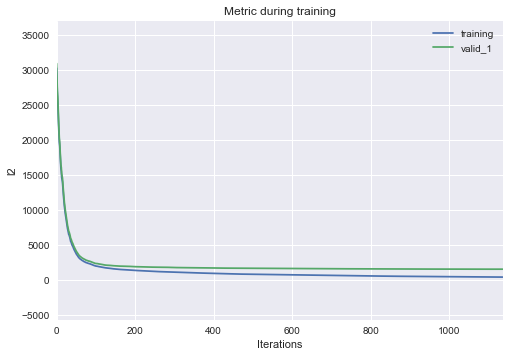

In [87]:
import lightgbm as lgb
import sklearn.datasets, sklearn.model_selection

# create dataset for lightgbm
lgb_train = lgb.Dataset(x_train, y_train)
lgb_test = lgb.Dataset(x_test, y_test, reference=lgb_train)

# to record eval results for plotting
evals_result = {} 


params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': {'l2'},
    'num_leaves': 20,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf':4,
     #'min_sum_hessian_in_leaf': 5,
    'verbose':10
}

print('Start training...')

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=8708,
                valid_sets=[lgb_train, lgb_test],
                evals_result=evals_result,
                verbose_eval=100,
                early_stopping_rounds=50)

ax = lgb.plot_metric(evals_result, metric='l2')
plt.show()

In [89]:
evals_result = {} 


params = {
    'task': 'train',
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'metric': 8,
    'num_leaves': 20,
    'max_bin' : 3,
    'max_depth' : 9,
    'learning_rate': 0.05,
    'feature_fraction': 0.9,
    'bagging_fraction': 0.8,
    'bagging_freq': 5,
    'min_data_in_leaf':4,
     #'min_sum_hessian_in_leaf': 5,
    'verbose':10
}

print('Start training...')

# train
gbm = lgb.train(params,
                lgb_train,
                num_boost_round=8708,
                valid_sets=[lgb_train, lgb_test],
                evals_result=evals_result,
                verbose_eval=1000,
                early_stopping_rounds=50)

ax = lgb.plot_metric(evals_result, metric='l2')
plt.show()

Start training...


LightGBMError: Cannot change max_bin after constructed Dataset handle.

In [82]:
from sklearn.model_selection import KFold, GridSearchCV

model=lgb.LGBMRegressor()
params = {
    'metric': ['8','9','10'],
    'num_leaves': [20],
    'max_bin' : ['2','3'],
    'max_depth' : ['9','10','11'],
    'learning_rate': [0.0001],
    'feature_fraction': [0.9],
    'bagging_fraction': [0.8],
    'bagging_freq': [5],
    'min_data_in_leaf':[4],
     #'min_sum_hessian_in_leaf': 5,
    'verbose':[10]
}

cv=KFold(n_splits=6, random_state=1)

gcv=GridSearchCV(model, param_grid=params, cv=cv, n_jobs=4)

gcv.fit(x_train.values, y_train.values)
print('final params', gcv.best_params_)   # 최적의 파라미터 값 출력      # 최고의 점수
#final params {'bagging_fraction': 0.8, 'bagging_freq': 5, 'feature_fraction': 0.9, 'learning_rate': 0.0001, 'max_bin': '3',
#              'max_depth': '9', 'metric': '8', 'min_data_in_leaf': 4, 'num_leaves': 20, 'verbose': 10}

C:\Users\HYS\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:293: FutureWarning: Setting a random_state has no effect since shuffle is False. This will raise an error in 0.24. You should leave random_state to its default (None), or set shuffle=True.
  warnings.warn(


[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] min_data_in_leaf is set=4, min_child_samples=20 will be ignored. Current value: min_data_in_leaf=4
[LightGBM] [Warning] bagging_fraction is set=0.8, subsample=1.0 will be ignored. Current value: bagging_fraction=0.8
[LightGBM] [Warning] bagging_freq is set=5, subsample_freq=0 will be ignored. Current value: bagging_freq=5
[LightGBM] [Debug] Dataset::GetMultiBinFromAllFeatures: sparse

In [38]:
from sklearn.metrics import mean_squared_error, r2_score
predict_train = gbm.predict(x_train)
predict_test = gbm.predict(x_test)
mse = mean_squared_error(y_test, predict_test)
r2 = r2_score(y_test, predict_test)
print('mse : ',mse)
print('r2 : ',r2)

NameError: name 'gbm' is not defined

In [ ]:
final_result = pd.concat([y_test.reset_index(drop=True), pd.DataFrame(predict_test)], axis = 1)
final_result.columns = ['label','predict']
sns.regplot(x = 'label', y = 'predict', data = final_result)

In [ ]:
plt.figure(figsize=(14, 8))
lgb.plot_metric(gbm)
plt.xlim(0,100)
plt.ylim(0,200000)